What is the impact of on top products on listing performance?

Are there any patterns in the data you would consider interesting or unexpected?

What is the influence of other variables included in the data set on listing performance?

Which additional data would you employ for further analyses? 

In [125]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

Loading the data set.

In [126]:
df = pd.read_csv ("../input/dataset/AS24 Data Analyst Case Study data 2021 04.csv",sep=';')
df_info = pd.read_csv ("../input/dataset/AS24 Data Analyst Case Study data descrip 2021 04.csv",sep=';')
pd.set_option('display.max_colwidth', -1)
df_info = df_info.rename({'column name': 'X'}, axis=1)
df_info[0:12]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  This is separate from the ipykernel package so we can avoid doing imports until


,X,description
0,article_id,unique article identifier
1,product_tier,premium status of the article
2,make_name,name of the car manufacturer
3,price,price of the article
4,first_zip_digit,first digit of the zip code of the region the article is offered in
5,first_registration_year,year of the first registration of the article
6,created_date,creation date of the listing
7,deleted_date,deletion date of the listing
8,search_views,number of times the article has been shown as a search result
9,detail_views,number of times the article has been clicked on


In [ ]:
df[0:5]

In [127]:
#The shape of data set.
print('The shape of our features is:', df.shape)
df=df.replace(np.nan,0)

The shape of our features is: (78321, 12)


In [179]:
#Check if there is a null data.
df.isnull().sum()

article_id                 0
product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

In [129]:
#Seeing unique value of product_tier.
print(df['product_tier'].unique())

['Basic' 'Premium' 'Plus']


In [130]:
df_car_count = df.groupby(['make_name'],as_index=False).agg({'detail_views':pd.Series.count})
df_car_count = df_car_count.sort_values(['detail_views'], ascending=[False])
df_car_count_cut = df_car_count[:20]
df_car_count_cut

,make_name,detail_views
88,Volkswagen,9430.0
73,Renault,6956.0
69,Peugeot,5446.0
67,Opel,5218.0
33,Ford,5199.0
60,Mercedes-Benz,4766.0
10,BMW,4554.0
89,Volvo,3994.0
85,Toyota,3924.0
8,Audi,3313.0


See the most top car in term of detail view.

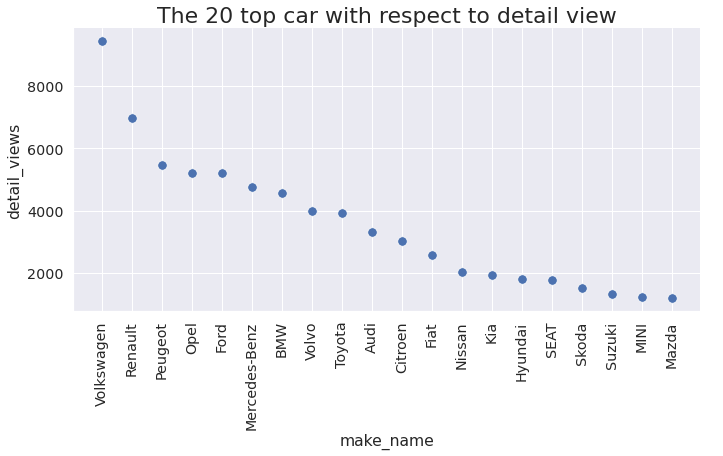

In [131]:
sns.set(font_scale=1.3)  # crazy big
ax = sns.FacetGrid(data=df_car_count_cut,height=5, aspect=2)
ax.map(sns.scatterplot, "make_name","detail_views",s=90)
ax.add_legend(fontsize=30)
plt.title("The 20 top car with respect to detail view",fontsize=22)
plt.xticks(rotation=90)

plt.show()

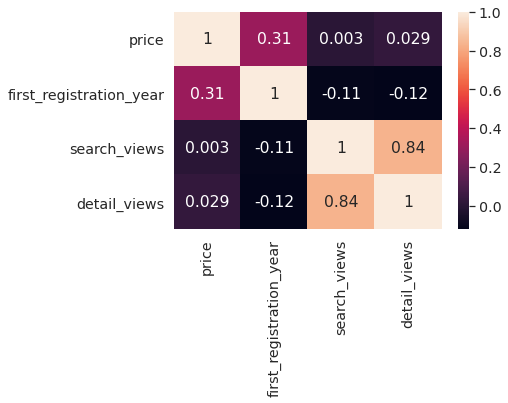

In [132]:
#To see the corralation between featurs
df_encoded = df[['product_tier','make_name','price','first_registration_year','search_views','detail_views']]
corr = df_encoded.corr(method='pearson')
sns.heatmap(corr,annot=True)
plt.show()

What is the impact of on top products on listing performance?


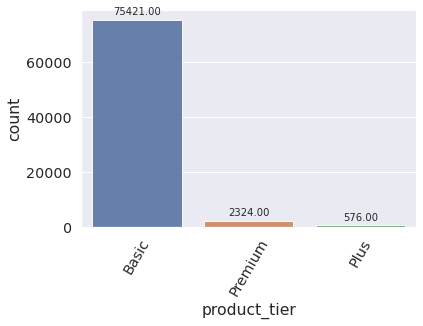

In [133]:
#here we will see the distribution of product_tier.
plots = sns.countplot(df['product_tier'],label="Count",alpha=0.9)  
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
    
plt.xticks(rotation=60)
plt.show()

1. As we can see the ratio of Permium and plus product to the basic is qute low (0.02 fo Permium and 0.007 for Plus respectively.

In [134]:
df_tier_count=df['product_tier'].value_counts()
df_tier=df_tier_count.to_frame().reset_index()
df_tier_count = df_tier_count.rename({'index': 'product_tier', 'product_tier':'count'}, axis=1)
df_tier_count["Ratio"] = df_tier.iloc[:, 1:].apply(lambda x: x / x.sum())
print(df_tier_count)
data = [['Basic', 0.962973], ['Premium', 0.029673], ['Plus', 0.007354]]
# Create the pandas DataFrame
df_count = pd.DataFrame(data, columns = ['product_tier', 'percentage'])
df_count

Basic      75421                                                          
Premium    2324                                                           
Plus       576                                                            
Ratio         product_tier
0  0.962973    
1  0.029673    
2  0.007354    
Name: product_tier, dtype: object


,product_tier,percentage
0,Basic,0.962973
1,Premium,0.029673
2,Plus,0.007354


In [135]:
#Lets see search view ratio per product_tier
df_tier_search = df.groupby('product_tier')['search_views'].sum().to_frame()
df_tier_search["Ratio"] = df_tier_search.iloc[:, 0:].apply(lambda x: x / x.sum())
df_tier_search = df_tier_search.reset_index()
df_tier_search
df_tier_search = df_tier_search.rename(columns={'Ratio':'Ratio_search'})
df_tier_search

,product_tier,search_views,Ratio_search
0,Basic,144642470.0,0.803928
1,Plus,3870400.0,0.021512
2,Premium,31406850.0,0.174560


In [136]:
#Lets see detail view ratio per product_tier
df_tier_details=df.groupby('product_tier')['detail_views'].sum().to_frame()
df_tier_details["Ratio"] = df_tier_details.iloc[:, 0:].apply(lambda x: x / x.sum())
df_tier_details = df_tier_details.reset_index()
df_tier_details
df_tier_details = df_tier_details.rename(columns={'Ratio':'Ratio_detail'})
df_tier_details

,product_tier,detail_views,Ratio_detail
0,Basic,6241881.0,0.852749
1,Plus,143267.0,0.019573
2,Premium,934571.0,0.127679


In [137]:
#Lets merge search view ratio and detain view ratio together.
df_merge1 = pd.merge(df_tier_details,df_count,on='product_tier')
df_merge = pd.merge( df_merge1,df_tier_search, on='product_tier')
df_merge

,product_tier,detail_views,Ratio_detail,percentage,search_views,Ratio_search
0,Basic,6241881.0,0.852749,0.962973,144642470.0,0.803928
1,Plus,143267.0,0.019573,0.007354,3870400.0,0.021512
2,Premium,934571.0,0.127679,0.029673,31406850.0,0.174560


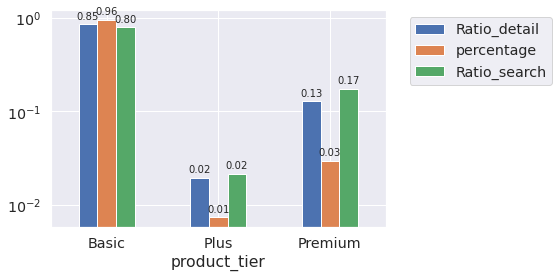

In [138]:
plots= df_merge.plot.bar(x='product_tier',y= ['Ratio_detail','percentage','Ratio_search'], logy=True)

for bar in plots.patches:
    
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
    
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


As we can see from the above plot, 0.96% of products is categorized as basics.
and only 0.01 and 0.03 of product are categorized as Plus and Permium.

But it is shown that the detail view and search view of Permium and Plus is higher with respect to thier contribution.

For example there is just 0.03 of whole category belong to permium but 
0.17 percent of all search view is belong to Perimum.

In [139]:
print(df['product_tier'].value_counts())
print(df.groupby('product_tier')['search_views'].sum())
print(df.groupby('product_tier')['detail_views'].sum())

Basic      75421
Premium    2324 
Plus       576  
Name: product_tier, dtype: int64
product_tier
Basic      144642470.0
Plus       3870400.0  
Premium    31406850.0 
Name: search_views, dtype: float64
product_tier
Basic      6241881.0
Plus       143267.0 
Premium    934571.0 
Name: detail_views, dtype: float64


Vidualizing Total detail view per car and product category(category_tier)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """


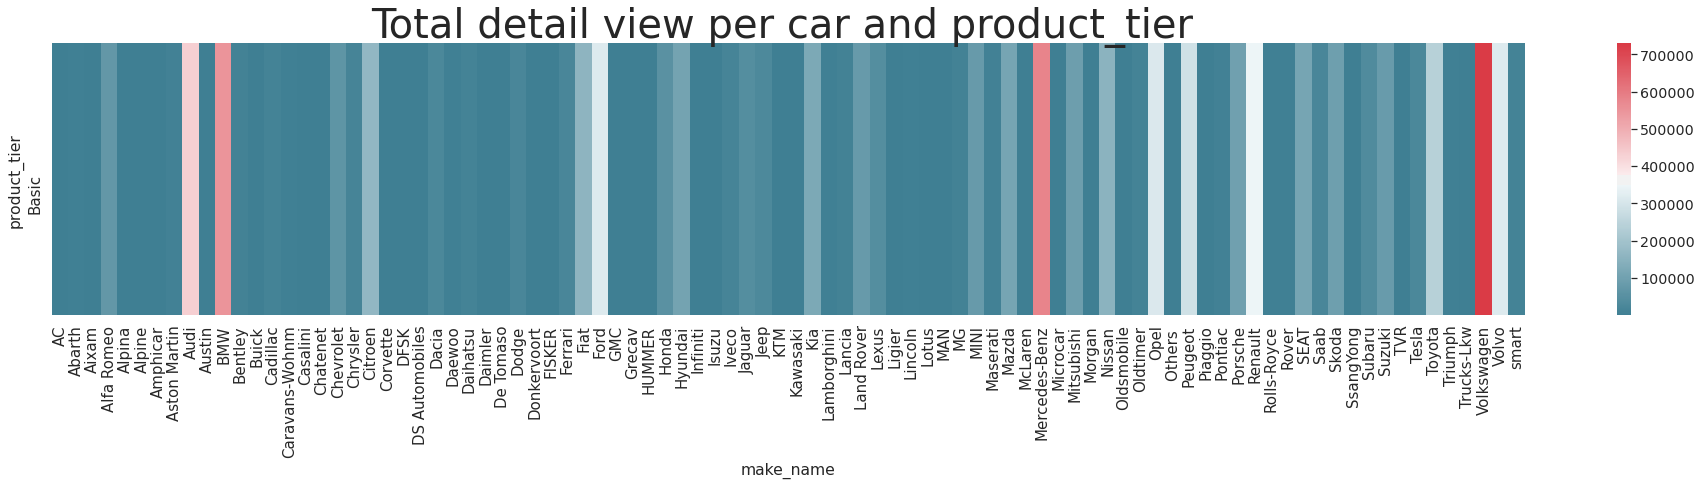

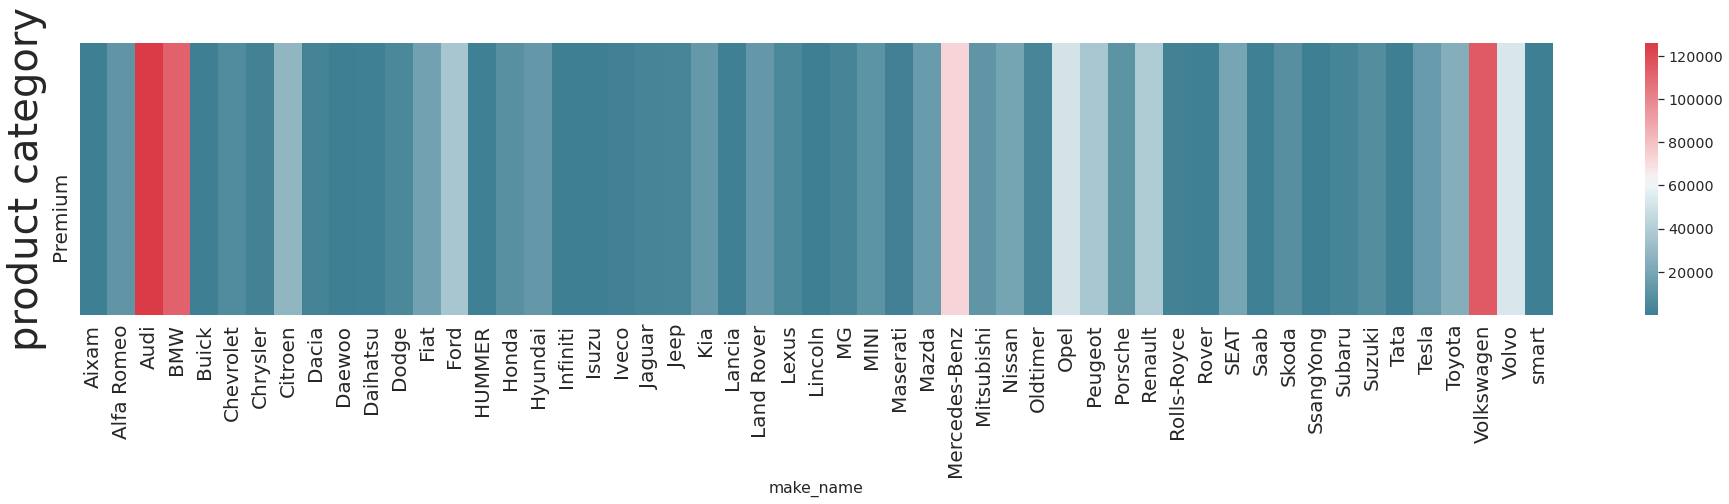

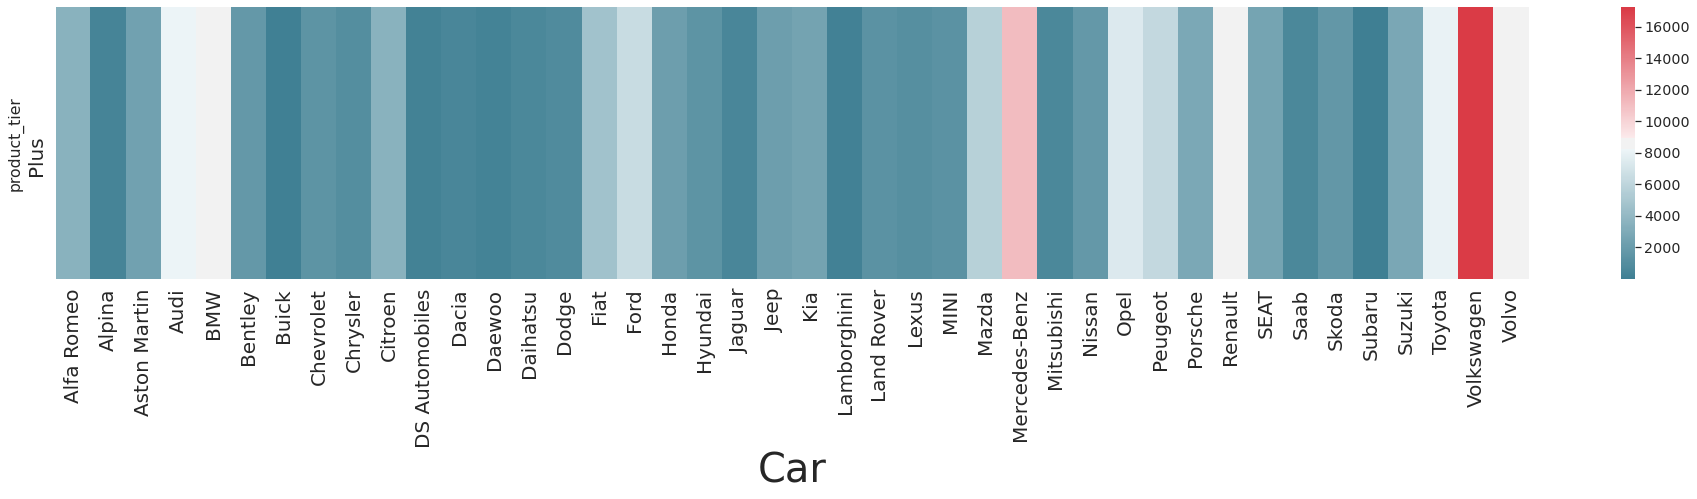

In [180]:
data_filter = df[df['product_tier'].str.contains('Basic')].groupby(['product_tier','make_name'])['detail_views','search_views'].sum()
data_filter = data_filter.reset_index()
data_filter_ = df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','make_name'])['detail_views','search_views'].sum()
data_filter_ = data_filter_.reset_index()
data_filter__ = df[df['product_tier'].str.contains('Plus')].groupby(['product_tier','make_name'])['detail_views','search_views'].sum()
data_filter__= data_filter__.reset_index()



df_heatmap = data_filter.pivot_table(values='detail_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=15)

plt.title('Total detail view per car and product_tier ', size = 40)
plt.show()


df_heatmap = data_filter_.pivot_table(values='detail_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=20)


plt.ylabel('product category',size = 40)
plt.show()


df_heatmap = data_filter__.pivot_table(values='detail_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=20)


plt.xlabel('Car',size = 40)
plt.show()

#,annot=True,fmt='g'



As we can see from the chart, in both Basic and Permium, Volkswagen, Mercedes_Benz, BMW and Audi, show the highest amount of Detail view. 
And in Plus category Volkswagen, Mercedes_Benz show the highest amount of Detail view.

Vidualizing Total detail view per car and product category(category_tier)

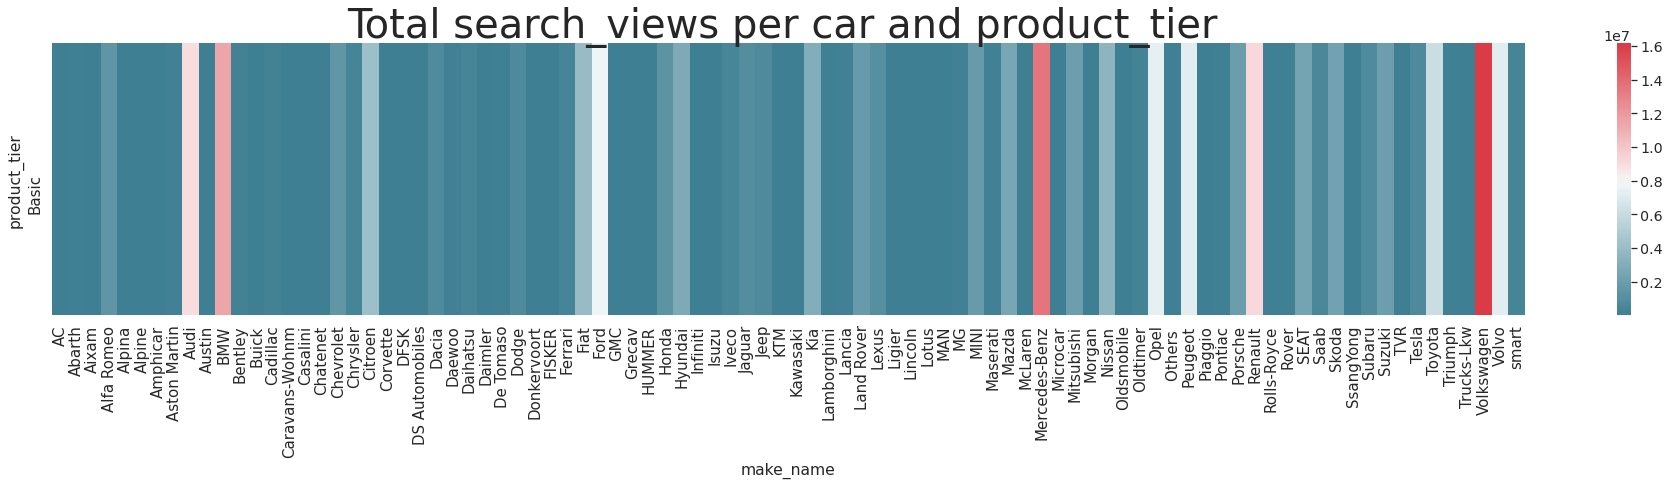

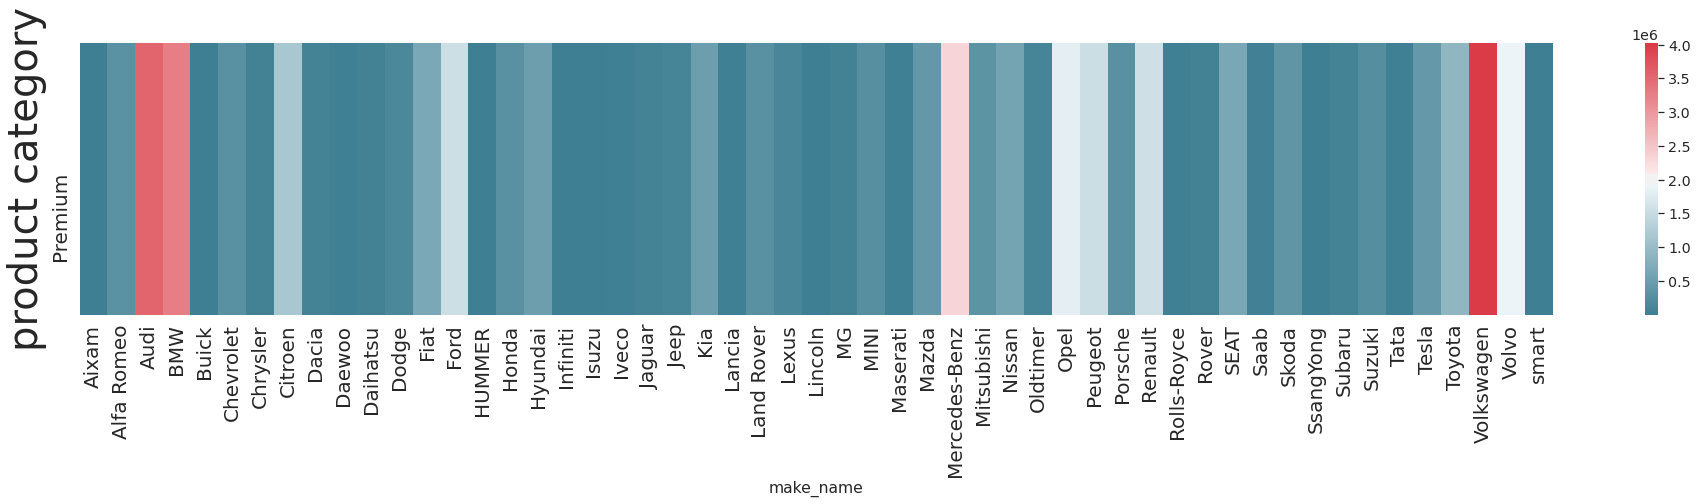

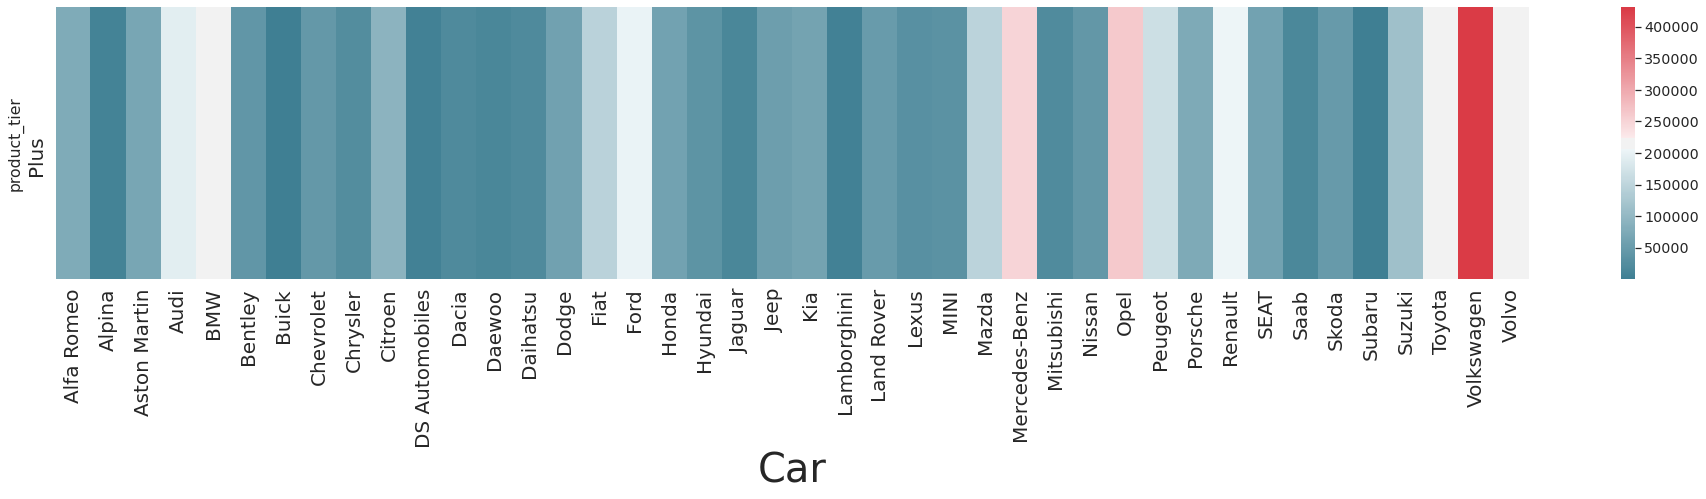

In [141]:

df_heatmap = data_filter.pivot_table(values='search_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=15)

plt.title('Total search_views per car and product_tier ', size = 40)
plt.show()


df_heatmap = data_filter_.pivot_table(values='search_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=20)


plt.ylabel('product category',size = 40)
plt.show()


df_heatmap = data_filter__.pivot_table(values='search_views',index='product_tier',columns='make_name',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(33,5))
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
ax.tick_params(labelsize=20)


plt.xlabel('Car',size = 40)
plt.show()

Vidualizing the correlation of search_views and car manufacturer and car price

In [142]:
data_filter_price=df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','make_name','price'])['detail_views','search_views'].sum()
data_filter_price = data_filter_price.reset_index()
data_filter_price = data_filter_price.sort_values(['price', 'search_views'], ascending=[False, False])
data_filter_price = data_filter_price [:500]
data_filter_price.head(6)

data_filter_price_b=df[df['product_tier'].str.contains('Basic')].groupby(['product_tier','make_name','price'])['detail_views','search_views'].sum()
data_filter_price_b= data_filter_price_b.reset_index()
data_filter_price_b= data_filter_price_b.sort_values(['price', 'search_views'], ascending=[False, False])
data_filter_price_b= data_filter_price_b[:500]
data_filter_price_b.head(6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


,product_tier,make_name,price,detail_views,search_views
4796,Basic,Ferrari,249888,128.0,3842.0
12437,Basic,Mercedes-Benz,248341,658.0,19785.0
2857,Basic,Bentley,239800,567.0,20950.0
4795,Basic,Ferrari,239500,2402.0,30772.0
15232,Basic,Others,235000,42.0,2079.0
17024,Basic,Porsche,229950,1772.0,15085.0


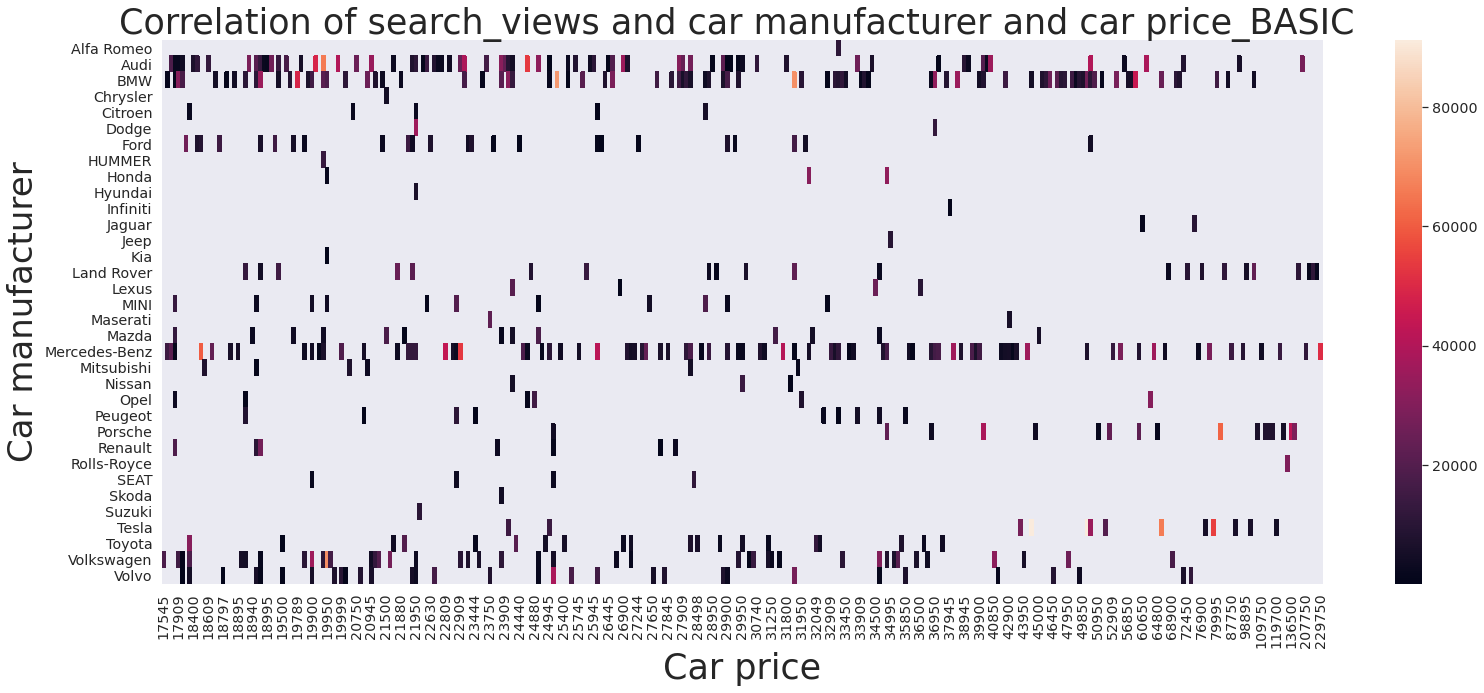

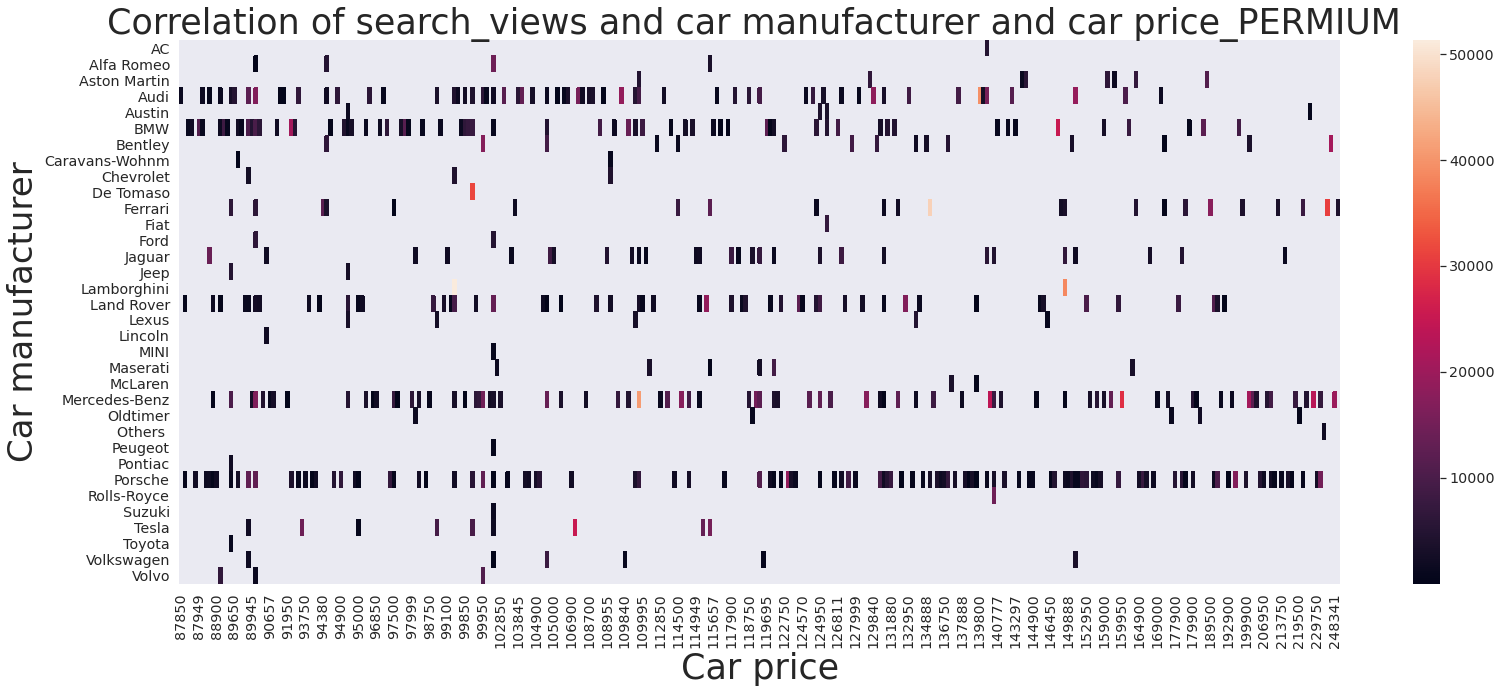

In [143]:
df_heatmap = data_filter_price.pivot_table(values='search_views',index='make_name',columns='price',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,10))         
sns.heatmap(df_heatmap)
plt.xlabel('Car price',size = 35)
plt.ylabel('Car manufacturer',size = 34)
plt.title('Correlation of search_views and car manufacturer and car price_BASIC ', size = 35)
plt.show()




df_heatmap = data_filter_price_b.pivot_table(values='search_views',index='make_name',columns='price',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,10))         
sns.heatmap(df_heatmap)
plt.xlabel('Car price',size = 35)
plt.ylabel('Car manufacturer',size = 34)
plt.title('Correlation of search_views and car manufacturer and car price_PERMIUM ', size = 35)
plt.show()

In the first and second chart, we can detect, the high amount of the search view with respect to price and brand.I just vidualized the top 500 with respect to price. in both basic and permium category. 
for example in permium category, it can be see that the highest amount of search view for Tesla, can be seen at price of 64800.

This chart shows diffrent range of car manufacturere price. 
Also it show for diffrent manufacturer in which price we have the highest amount of serach views.
For Example, for Volkswagen, at the price of 

In [144]:
data_benz=df[df['make_name'].str.contains('Mercedes-Benz')].groupby(['product_tier','make_name','price'])['detail_views','search_views'].sum()
data_benz = data_benz.reset_index()
data_benz = data_benz.sort_values(['price', 'search_views'], ascending=[False, False])
#data_filter_price = data_filter_price [:500]
data_benz.head(6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,product_tier,make_name,price,detail_views,search_views
1420,Basic,Mercedes-Benz,248341,658.0,19785.0
1419,Basic,Mercedes-Benz,229950,300.0,7161.0
1597,Premium,Mercedes-Benz,229750,2453.0,50721.0
1418,Basic,Mercedes-Benz,228094,883.0,23321.0
1417,Basic,Mercedes-Benz,219950,397.0,4749.0
1416,Basic,Mercedes-Benz,217327,302.0,7569.0


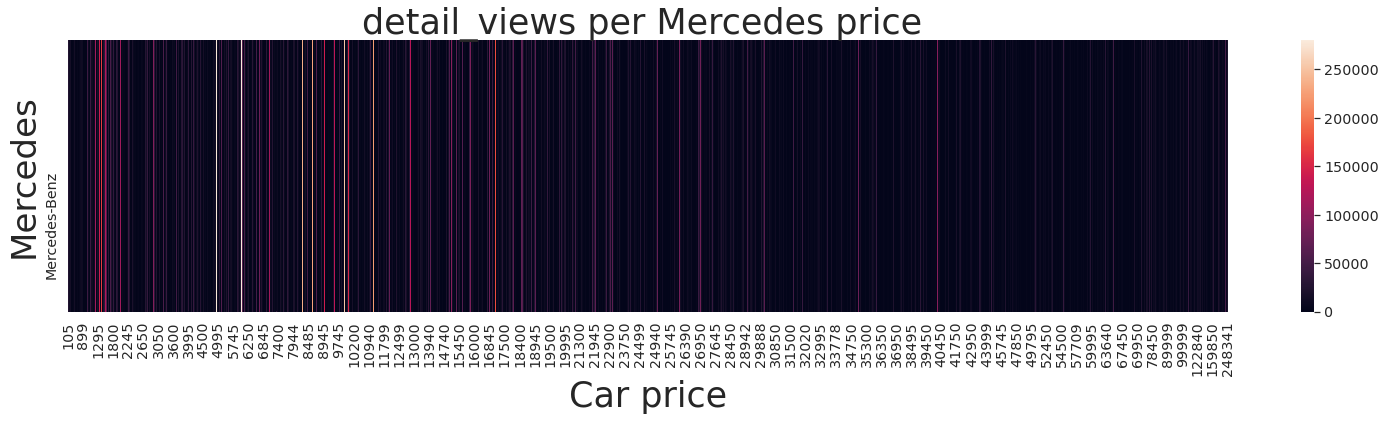

In [146]:
df_heatmap = data_benz.pivot_table(values='search_views',index='make_name',columns='price',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,5))         
sns.heatmap(df_heatmap)
plt.xlabel('Car price',size = 35)
plt.ylabel('Mercedes',size = 34)
plt.title('detail_views per Mercedes price ',size = 35)
plt.show()

In [147]:
rr=df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','make_name','price'])['detail_views','search_views'].sum()
rr = rr.reset_index()
rr = rr.sort_values(['price', 'search_views'], ascending=[False, False])
rr = rr [:100]
rr.head(6)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,product_tier,make_name,price,detail_views,search_views
972,Premium,Mercedes-Benz,229750,2453.0,50721.0
739,Premium,Land Rover,219880,358.0,2082.0
738,Premium,Land Rover,216535,577.0,11153.0
737,Premium,Land Rover,209650,188.0,1857.0
971,Premium,Mercedes-Benz,207750,771.0,12095.0
162,Premium,Audi,159900,1281.0,27592.0


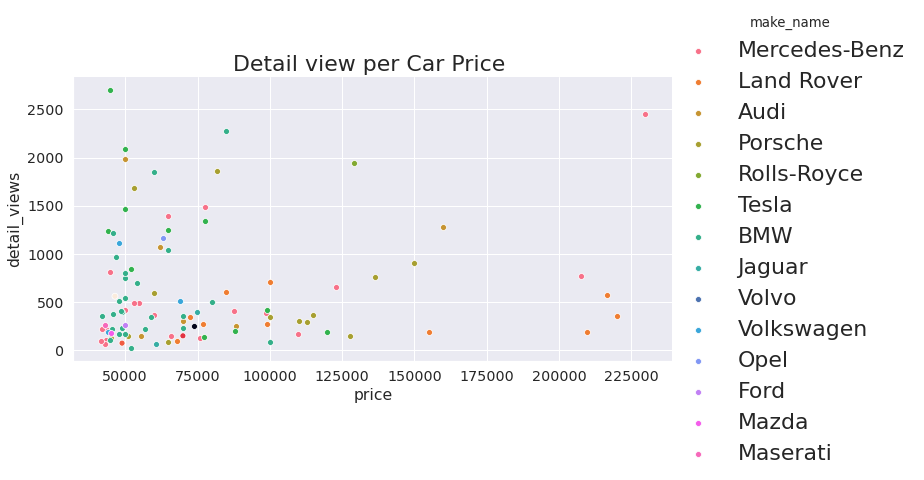

In [150]:
import seaborn as sns
sns.set(font_scale=1.3)  # crazy big
ax = sns.FacetGrid(data = rr ,hue="make_name",height=5, aspect=2)
ax.map(sns.scatterplot,'price',"detail_views")
ax.add_legend(fontsize=22)
plt.title("Detail view per Car Price ",fontsize=22)
plt.show()

In [ ]:
print(df['first_zip_digit'].unique())


In [154]:
d1 = df[df['product_tier'].str.contains('Basic')].groupby(['product_tier','first_zip_digit'],as_index=False).agg({'detail_views':pd.Series.sum})
d2 = df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','first_zip_digit'],as_index=False).agg({'detail_views':pd.Series.sum})
d3 = df[df['product_tier'].str.contains('Plus')].groupby(['product_tier','first_zip_digit'],as_index=False).agg({'detail_views':pd.Series.sum})




d3.head(3)

,product_tier,first_zip_digit,detail_views
0,Plus,1,12491.0
1,Plus,2,19316.0
2,Plus,3,19747.0


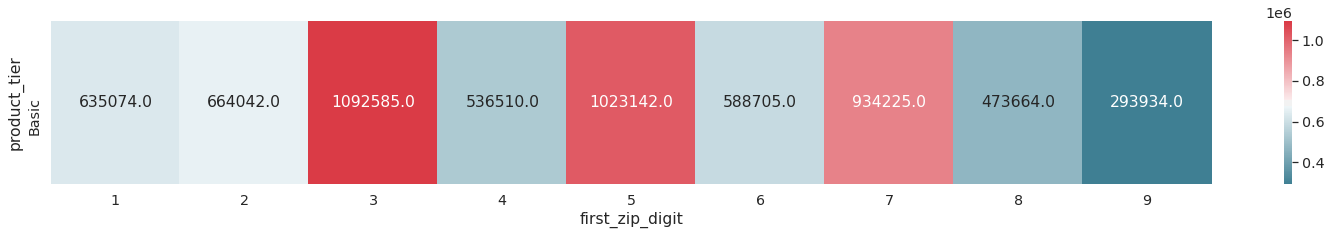

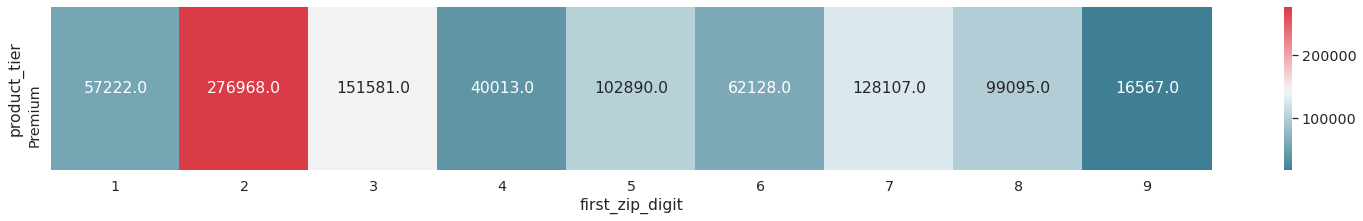

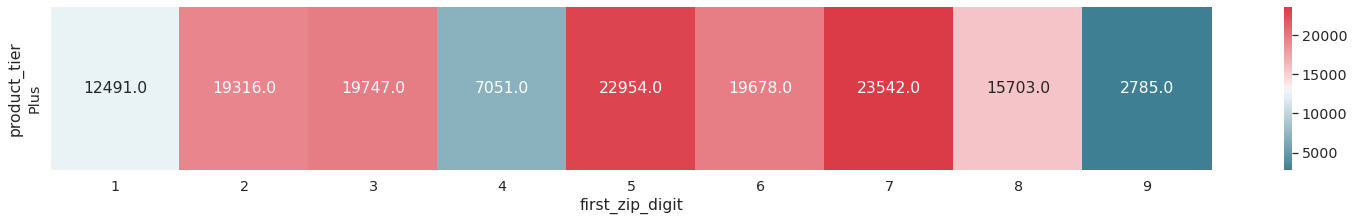

In [156]:
df_heatmap = d1.pivot_table(values='detail_views',index='product_tier',columns='first_zip_digit',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,3))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,fmt='.1f')
plt.show()


df_heatmap = d2.pivot_table(values='detail_views',index='product_tier',columns='first_zip_digit',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,3))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,fmt='.1f')
plt.show()


df_heatmap = d3.pivot_table(values='detail_views',index='product_tier',columns='first_zip_digit',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,3))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),annot=True,fmt='.1f')
plt.show()

In [161]:
bb = df.groupby(['product_tier','make_name','first_zip_digit'],as_index=False).agg({'detail_views':pd.Series.count})
bb

,product_tier,make_name,first_zip_digit,detail_views
0,Basic,AC,6,1.0
1,Basic,Abarth,1,1.0
2,Basic,Abarth,2,3.0
3,Basic,Abarth,3,6.0
4,Basic,Abarth,5,1.0
...,...,...,...,...
1020,Premium,Volvo,6,3.0
1021,Premium,Volvo,7,31.0
1022,Premium,Volvo,8,18.0
1023,Premium,Volvo,9,1.0


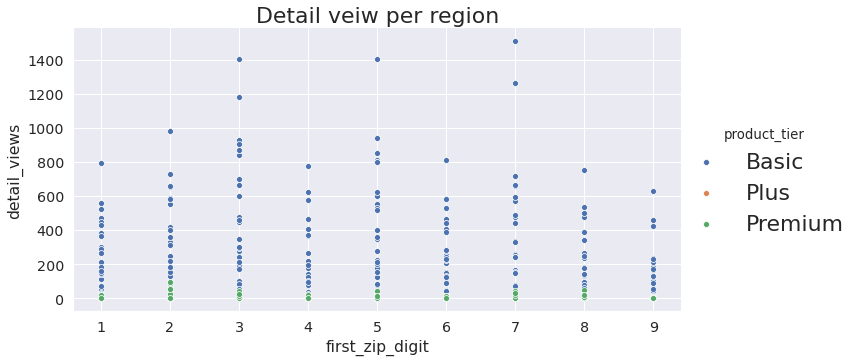

In [162]:
sns.set(font_scale=1.3)  # crazy big

ax = sns.FacetGrid(data=bb,hue="product_tier",height=5, aspect=2)

ax.map(sns.scatterplot, "first_zip_digit","detail_views")

ax.add_legend(fontsize=22)

plt.title("Detail veiw per region",fontsize=22)

plt.show()

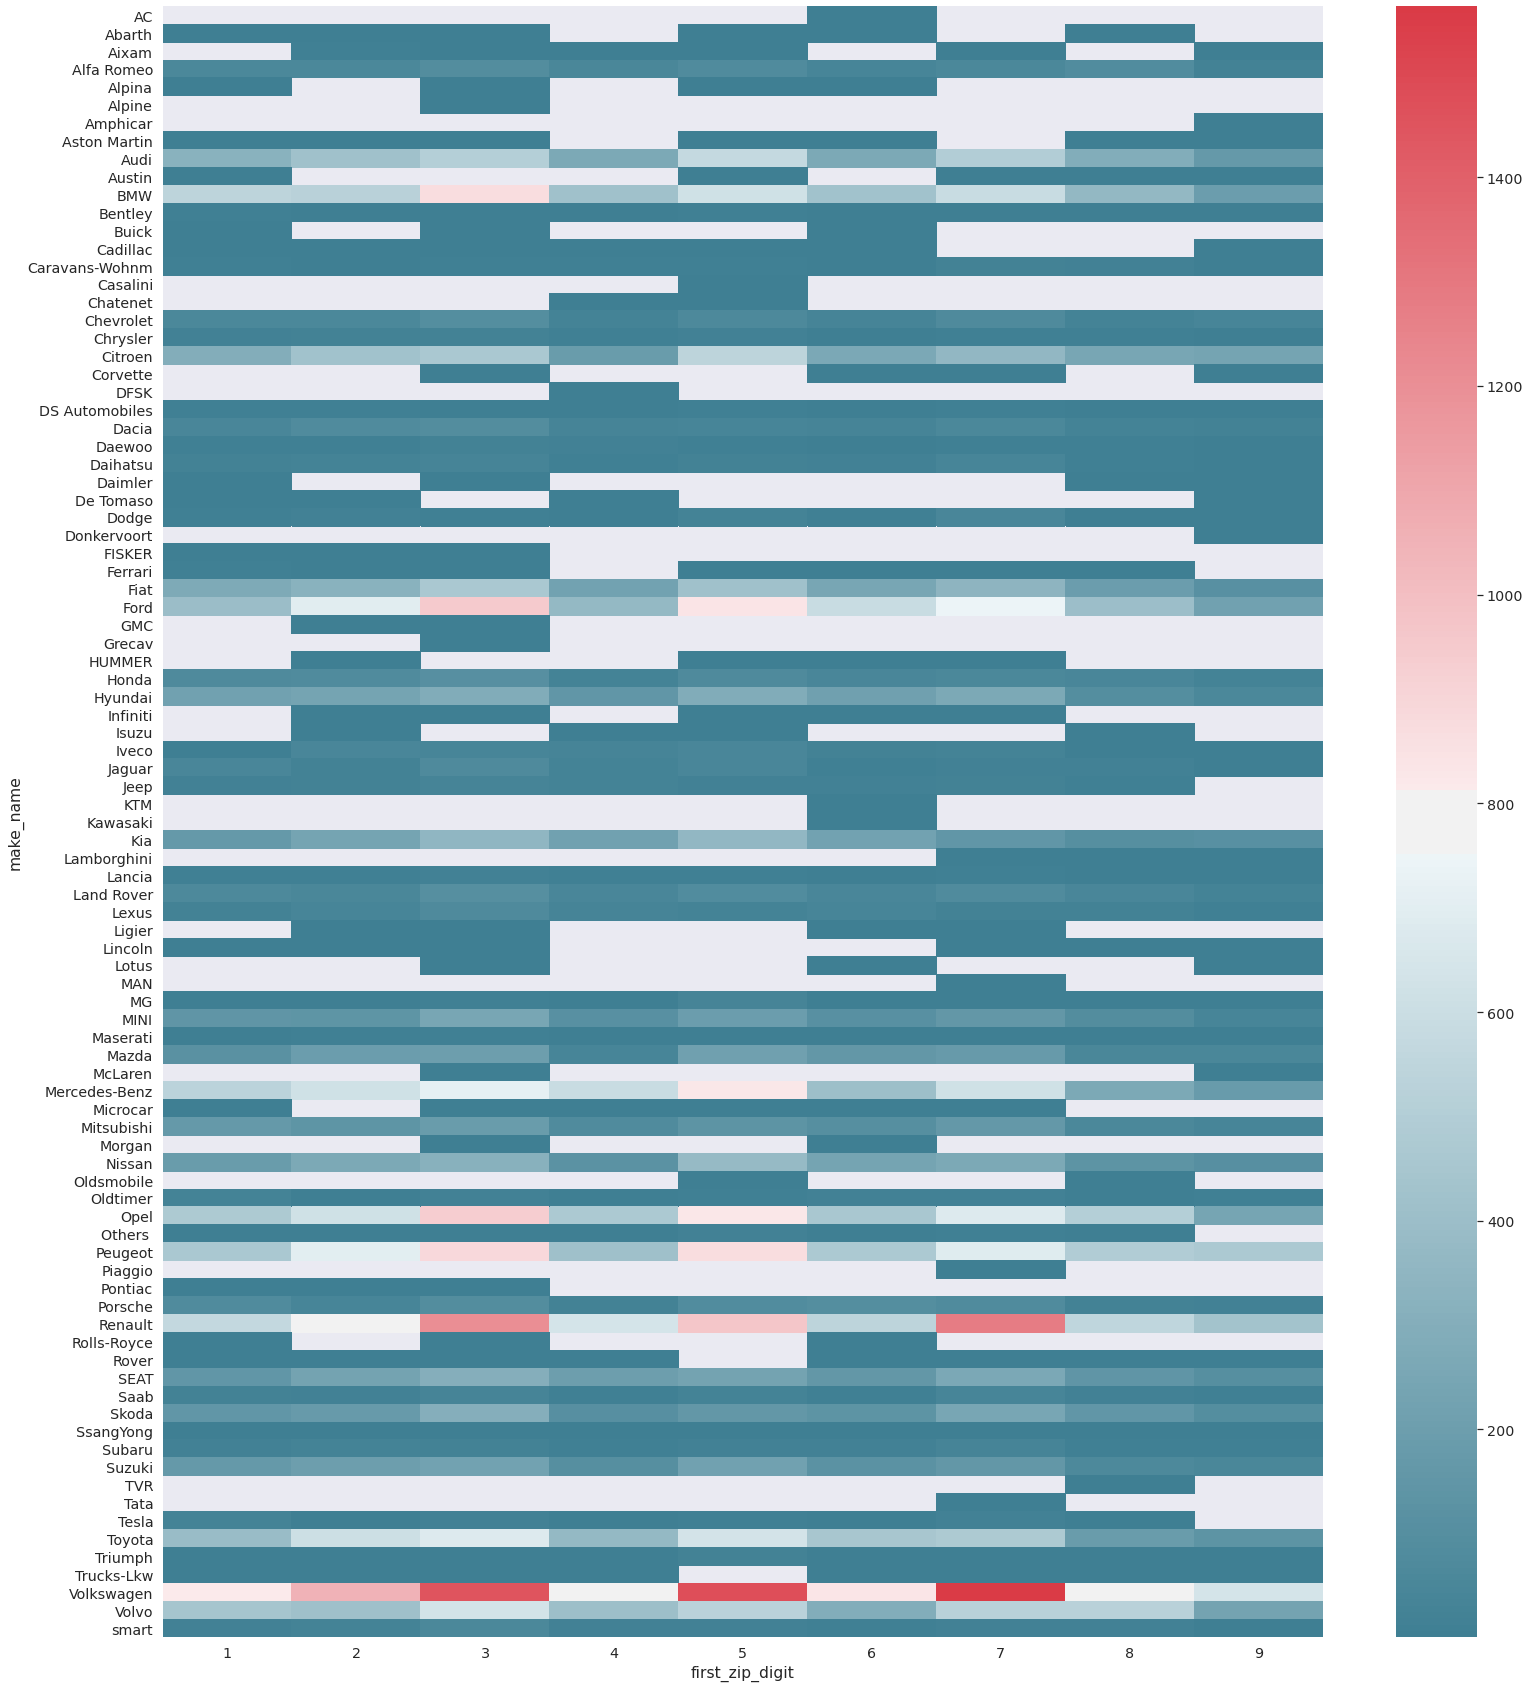

In [163]:
df_heatmap = bb.pivot_table(values='detail_views',index='make_name',columns='first_zip_digit',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,30))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.show()

In [169]:
f1 = df[df['product_tier'].str.contains('Basic')].groupby(['product_tier','first_registration_year'],as_index=False).agg({'detail_views':pd.Series.sum})
f2 = df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','first_registration_year'],as_index=False).agg({'detail_views':pd.Series.sum})
f3 = df[df['product_tier'].str.contains('Plus')].groupby(['product_tier','first_registration_year'],as_index=False).agg({'detail_views':pd.Series.sum})
f3 [:5]

,product_tier,first_registration_year,detail_views
0,Plus,1969,158.0
1,Plus,1987,1015.0
2,Plus,1990,2277.0
3,Plus,1993,586.0
4,Plus,1995,409.0


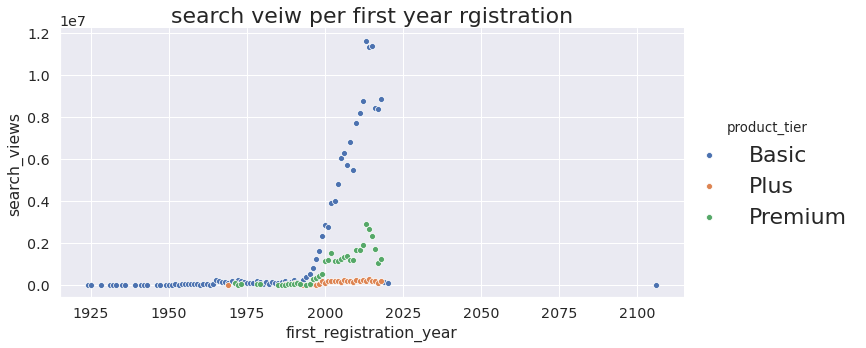

In [165]:
import seaborn as sns
sns.set(font_scale=1.3)  # crazy big

ax = sns.FacetGrid(data=nn,hue="product_tier",height=5, aspect=2)

ax.map(sns.scatterplot, "first_registration_year","search_views")

ax.add_legend(fontsize=22)

plt.title("search veiw per first year rgistration",fontsize=22)

plt.show()

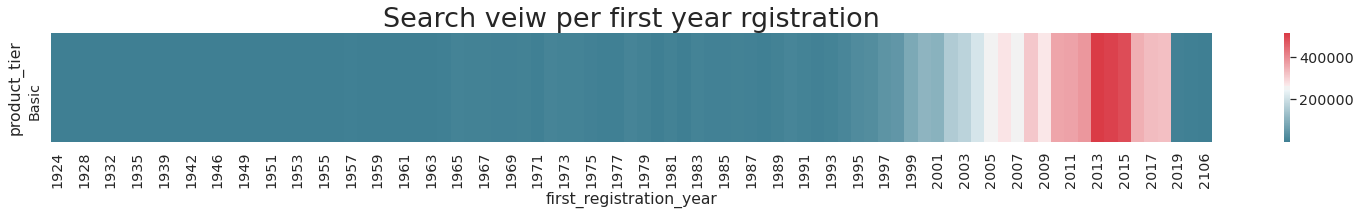

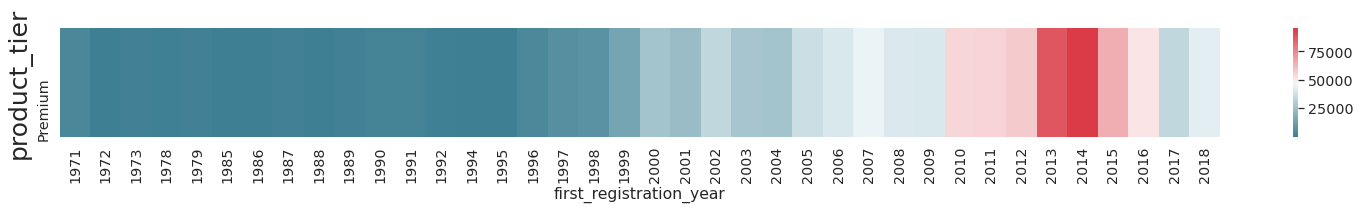

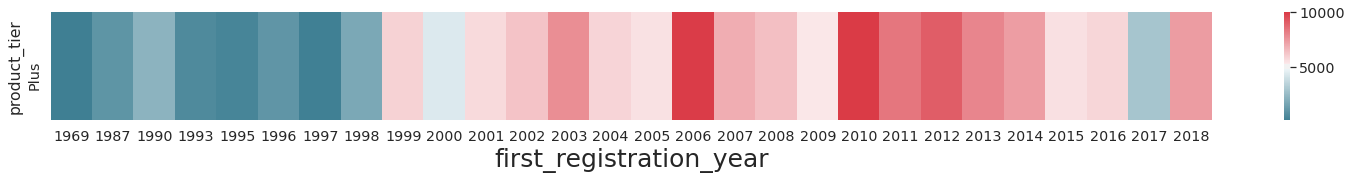

In [174]:
df_heatmap = f1.pivot_table(values='detail_views',index='product_tier',columns='first_registration_year',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.title('Search veiw per first year rgistration', size = 27)

plt.show()


df_heatmap = f2.pivot_table(values='detail_views',index='product_tier',columns='first_registration_year',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.ylabel('product_tier',size = 25)

plt.show()


df_heatmap = f3.pivot_table(values='detail_views',index='product_tier',columns='first_registration_year',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.xlabel('first_registration_year',size = 25)


plt.show()

In [186]:
mm1 = df[df['product_tier'].str.contains('Basic')].groupby(['product_tier','stock_days'],as_index=False).agg({'detail_views':pd.Series.sum})
mm2 = df[df['product_tier'].str.contains('Premium')].groupby(['product_tier','stock_days'],as_index=False).agg({'detail_views':pd.Series.sum})
mm3 = df[df['product_tier'].str.contains('Plus')].groupby(['product_tier','stock_days'],as_index=False).agg({'detail_views':pd.Series.sum})



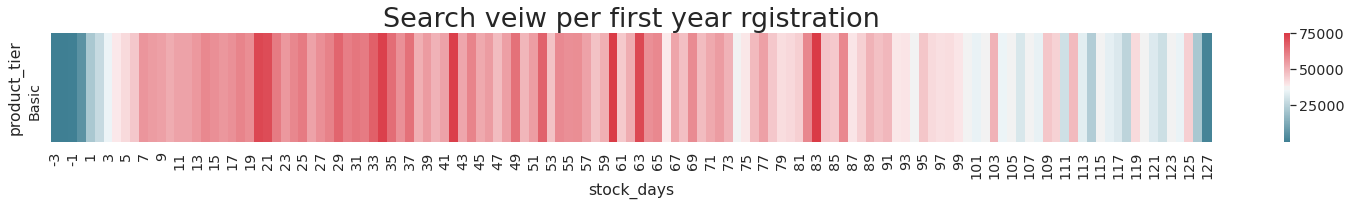

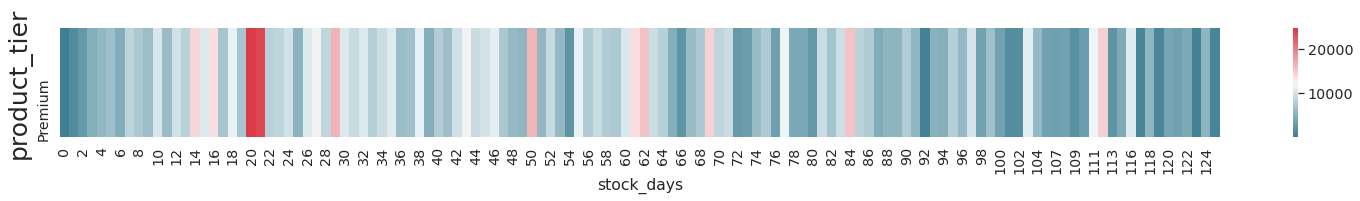

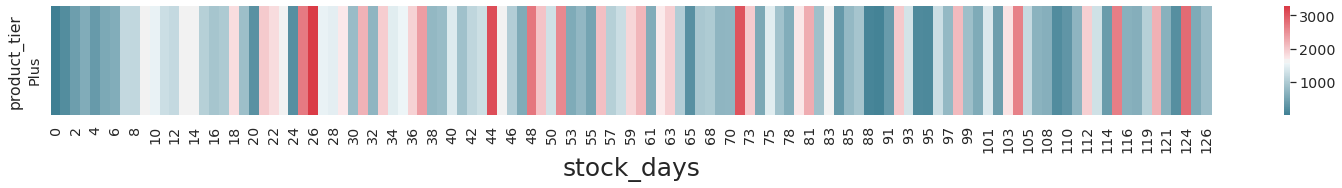

In [189]:
df_heatmap = mm1.pivot_table(values='detail_views',index='product_tier',columns='stock_days',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.title('Search veiw per first year rgistration', size = 27)

plt.show()


df_heatmap = mm2.pivot_table(values='detail_views',index='product_tier',columns='stock_days',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.ylabel('product_tier',size = 25)

plt.show()


df_heatmap = mm3.pivot_table(values='detail_views',index='product_tier',columns='stock_days',aggfunc=pd.Series.sum)
fig, ax = plt.subplots(figsize=(26,2))         
sns.heatmap(df_heatmap,cmap=sns.diverging_palette(220, 10, as_cmap=True),fmt='.1f')
plt.xlabel('stock_days',size = 25)


plt.show()